In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import random 
import tensorflow as tf
from matplotlib import pylab as plt
import matplotlib as mpl


# In[210]:


mpl.rcParams['figure.dpi']= 150

In [2]:
random.seed(1234)
np.random.seed(2345)
tf.random.set_seed(3456)

In [6]:
from weight import simulation, learn, utils, config
Config = config.Config
x_span = config.Config.x_span
y_span = config.Config.y_span

milestones = [1, 100, 500, 1000] # checkpoint at each milestone epoch

In [7]:
X, y = simulation.lin_sep()
margins = learn.get_margin(X, y)
LR = 1 / np.linalg.svd(X)[1][0]
print(LR)

sample_weight = learn.make_class_weight(y, 0.5, 0.5)
curve_1 = learn.run_linear(X, y, sample_weight, 
                           l2=0, lr=LR, milestones=milestones)

lr_model, lr_weights = learn.run_non_linear(X, y, sample_weight, 
                                        l2=0, lr=LR, milestones=milestones)

0.022665336890355273
doing - 1 epoch
doing - 100 epoch
doing - 500 epoch
doing - 1000 epoch
doing - 1 epoch
doing - 100 epoch
doing - 500 epoch
doing - 1000 epoch


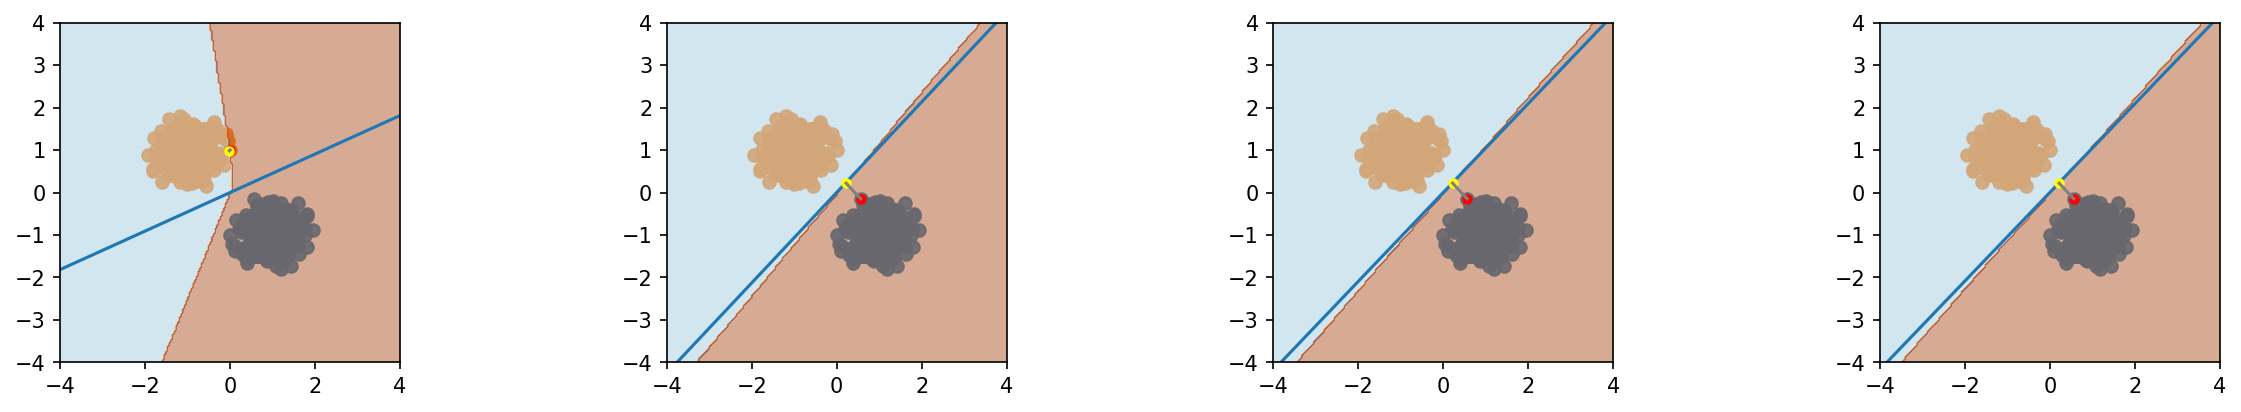

In [8]:
deep_results = utils.preprocess_deep(X, y, x_span, y_span, lr_model, lr_weights)
utils.progress_plot(X, y, x_span, y_span,
                    lin_results=curve_1, deep_results=deep_results)

In [9]:
X, y = simulation.non_lin_sep()
LR = 1 / np.linalg.svd(X)[1][0]
print(LR)
sample_weight = learn.make_class_weight(y, 0.5, 0.5)
n_curve_2 = learn.run_linear(X, y, sample_weight, lr=LR, milestones=milestones)
mlp, mlp_weights = learn.run_non_linear(X, y, sample_weight, 
                                        l2=0, lr=LR, milestones=milestones)

0.02029182188736918
doing - 1 epoch
doing - 100 epoch
doing - 500 epoch
doing - 1000 epoch
doing - 1 epoch
doing - 100 epoch
doing - 500 epoch
doing - 1000 epoch


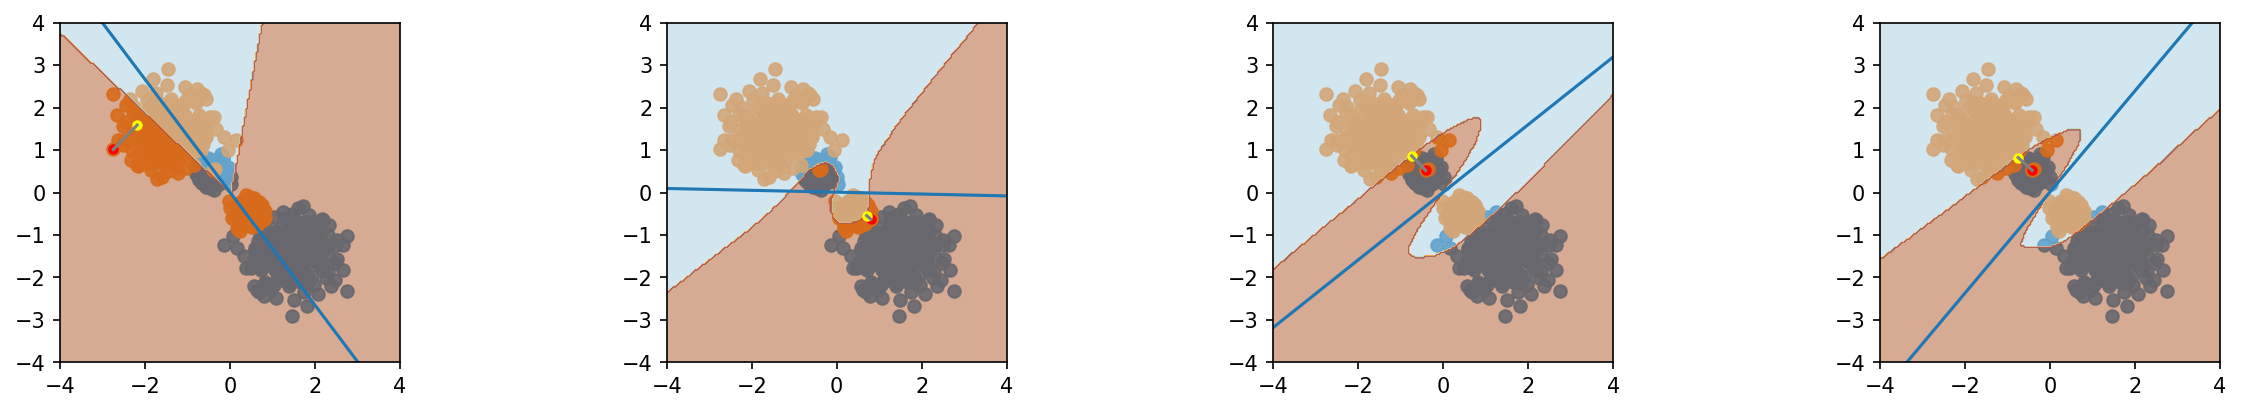

In [10]:
deep_results = utils.preprocess_deep(X, y, x_span, y_span, mlp, mlp_weights)
utils.progress_plot(X, y, x_span, y_span,
                    lin_results=n_curve_2, deep_results=deep_results)

In [11]:
X, y = simulation.non_lin_moon(0.05)
LR = 1 / np.linalg.svd(X)[1][0]
print(LR)
sample_weight = learn.make_class_weight(y, 0.5, 0.5)

m_curve_1 = learn.run_linear(X, y, sample_weight, lr=LR, milestones=milestones)

mlp, mlp_weights = learn.run_non_linear(X, y, sample_weight, lr=LR, milestones=milestones)

0.030617381759323357
doing - 1 epoch
doing - 100 epoch
doing - 500 epoch
doing - 1000 epoch
doing - 1 epoch
doing - 100 epoch
doing - 500 epoch
doing - 1000 epoch


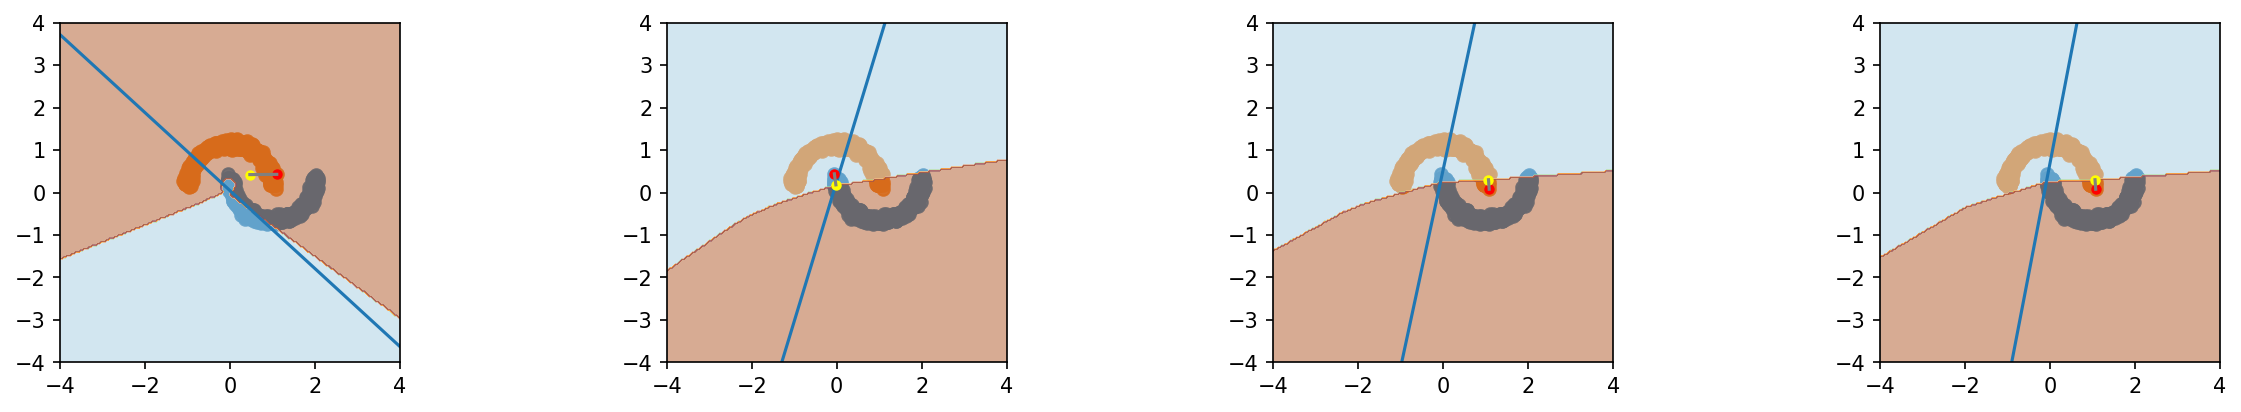

In [12]:
deep_results = utils.preprocess_deep(X, y, x_span, y_span, mlp, mlp_weights)
utils.progress_plot(X, y, x_span, y_span,
                    lin_results=m_curve_1, deep_results=deep_results)